In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [2]:
def generarPuntosMuestra(numeroMuestras, listaCoeficientesHiperplano, minimoValorCoordenadasPuntos, maximoValorCoordenadasPuntos, numeroDimensiones, margenMaximoError = 5.0):
    listaPuntosMuestra = []
    listaAbscisasPuntosMuestra = []
    
    #Se generan los puntos (Se tiene como restriccion que las coordenadas de abscisas del punto no se repitan)
    for indice in range(numeroMuestras):
        puntoMuestraValido = False
        while puntoMuestraValido == False:
            abscisasPuntoGenerado = list(np.random.uniform(low = minimoValorCoordenadasPuntos, high = maximoValorCoordenadasPuntos, size = numeroDimensiones - 1))
            if abscisasPuntoGenerado not in listaAbscisasPuntosMuestra:
                listaAbscisasPuntosMuestra.append(abscisasPuntoGenerado)
                valorPunto = np.dot(listaCoeficientesHiperplano[0:(numeroDimensiones - 1)], abscisasPuntoGenerado) + listaCoeficientesHiperplano[numeroDimensiones - 1] + margenMaximoError * np.random.uniform(low = -1.0, high = 1.0, size = 1)
                puntoGenerado = abscisasPuntoGenerado + [valorPunto[0]]
                listaPuntosMuestra.append(puntoGenerado)
                puntoMuestraValido = True
    return listaPuntosMuestra

def obtenerListasCoordenadasRespectivas(listaPuntos, numeroDimensiones):
    diccionarioPuntosPorCoordenadas = {}
    for indice in range(numeroDimensiones):
        diccionarioPuntosPorCoordenadas[indice] = []
        
    for puntoActual in listaPuntos:
        for indice in range(numeroDimensiones):
            coordenadaActual = puntoActual[indice]
            diccionarioPuntosPorCoordenadas[indice].append(coordenadaActual)
    return diccionarioPuntosPorCoordenadas

def calcularMargenErrorCometido(listaPuntos, listaCoeficientesHiperplano, numeroDimensiones):
    errorTotal = 0.0
    for punto in listaPuntos:
        abscisasPunto = punto[0:(numeroDimensiones - 1)]
        valorPunto = np.dot(listaCoeficientesHiperplano[0:(numeroDimensiones - 1)], abscisasPunto) + listaCoeficientesHiperplano[numeroDimensiones - 1]
        errorTotal += np.abs(punto[numeroDimensiones - 1] - valorPunto)
    return errorTotal / len(listaPuntos)

In [3]:
#Parametros de ejecucion del programa
tasaAprendizaje = 0.001
numeroDimensiones = 3
minimoValorCoordenadasPuntos = -20.0
maximoValorCoordenadasPuntos = 20.0
listaCoeficientesHiperplanoBase = [1.0] * numeroDimensiones
margenMaximoError = 3.5
numeroMuestras = 100
tiempoPausaAnimacion = 0.01

In [4]:
listaCoeficientesHiperplano = listaCoeficientesHiperplanoBase
listaPuntosMuestra = generarPuntosMuestra(numeroMuestras, listaCoeficientesHiperplanoBase, minimoValorCoordenadasPuntos, maximoValorCoordenadasPuntos, numeroDimensiones, margenMaximoError = margenMaximoError)

In [5]:
#Este bloque de codigo se puede comentar para que el hiperplano propuesto inicialmente este cerca del hiperplano de minimo error que estima un modelo matematico lineal de los puntos y por lo tanto se ejecuta el algoritmo Adaline con pocas iteraciones
listaCoeficientesHiperplanoBase = list(np.random.uniform(low = -15.0, high = 15.0, size = numeroDimensiones))

/tmp/ipykernel_14760/1797765593.py:35: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = currentFigure.gca(projection = '3d')


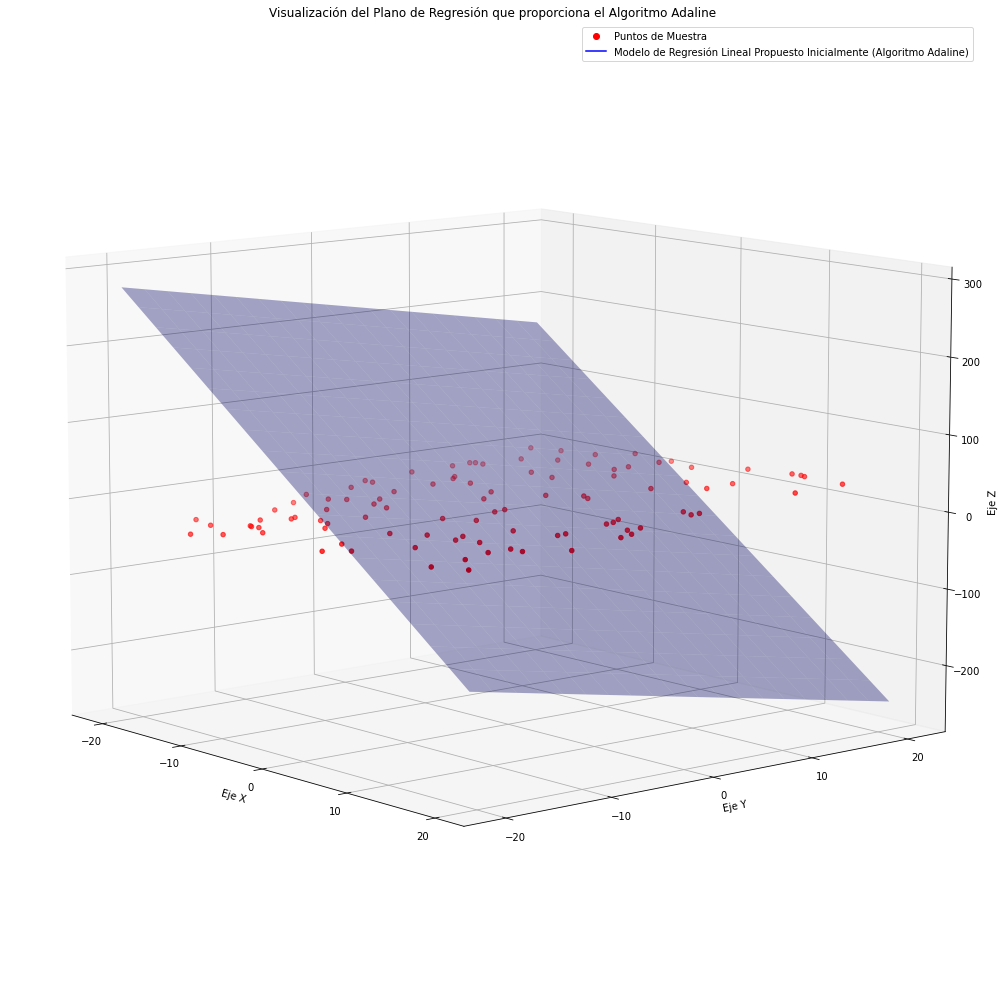

In [6]:
listaPuntosPorCoordenadasRespectivas = obtenerListasCoordenadasRespectivas(listaPuntosMuestra, numeroDimensiones)
valoresCoordenadasXPuntosMuestra = listaPuntosPorCoordenadasRespectivas[0]
valoresCoordenadasYPuntosMuestra = listaPuntosPorCoordenadasRespectivas[1]
valoresCoordenadasZPuntosMuestra = None
minimoEjeX = np.min(valoresCoordenadasXPuntosMuestra) - 1
maximoEjeX = np.max(valoresCoordenadasXPuntosMuestra) + 1
minimoEjeY = None
maximoEjeY = None

numeroMuestrasHiperplanoRegresion = 20
if numeroDimensiones == 2:
    listaValoresCoordenadaXHiperplanoBase = np.linspace(minimoEjeX, maximoEjeX, num = numeroMuestrasHiperplanoRegresion)
    listaValoresCoordenadaYHiperplanoBase = [listaCoeficientesHiperplanoBase[0] * valorX + listaCoeficientesHiperplanoBase[1] for valorX in listaValoresCoordenadaXHiperplanoBase]

    plt.figure(num = 1, figsize = (15, 14))
    plt.plot(valoresCoordenadasXPuntosMuestra, valoresCoordenadasYPuntosMuestra, 'ro', label = "Puntos de Muestra")
    plt.plot(listaValoresCoordenadaXHiperplanoBase, listaValoresCoordenadaYHiperplanoBase, 'b-', label = "Modelo de Regresión Lineal Propuesto Inicialmente (Algoritmo Adaline)")
    plt.legend(loc = 'upper left')
    plt.xlabel("Eje X")
    plt.ylabel("Eje Y")
    plt.title("Visualización de la Recta de Regresión que proporciona el Algoritmo Adaline")
    plt.grid(True)
    plt.show()
elif numeroDimensiones == 3:
    valoresCoordenadasZPuntosMuestra = listaPuntosPorCoordenadasRespectivas[2]
    minimoEjeY = np.min(valoresCoordenadasYPuntosMuestra) - 1
    maximoEjeY = np.max(valoresCoordenadasYPuntosMuestra) + 1

    listaValoresCoordenadaXHiperplanoBase = np.linspace(minimoEjeX, maximoEjeX, num = numeroMuestrasHiperplanoRegresion)
    listaValoresCoordenadaYHiperplanoBase = np.linspace(minimoEjeY, maximoEjeY, num = numeroMuestrasHiperplanoRegresion)
    listaValoresCoordenadaXHiperplanoBase, listaValoresCoordenadaYHiperplanoBase = np.meshgrid(listaValoresCoordenadaXHiperplanoBase, listaValoresCoordenadaYHiperplanoBase)
    listaValoresCoordenadaZHiperplanoBase = listaCoeficientesHiperplanoBase[0] * listaValoresCoordenadaXHiperplanoBase + listaCoeficientesHiperplanoBase[1] * listaValoresCoordenadaYHiperplanoBase + listaCoeficientesHiperplanoBase[2]
    
    currentFigure = plt.figure(num = 1, figsize = (15, 14))
    ax = currentFigure.gca(projection = '3d')
    ax.view_init(elev = 10, azim = -40)
    ax.scatter(valoresCoordenadasXPuntosMuestra, valoresCoordenadasYPuntosMuestra, valoresCoordenadasZPuntosMuestra, c = 'r', marker = 'o')
    etiquetaLeyendaPuntosMuestra = mpl.lines.Line2D([0], [0], linestyle = "none", c = 'r', marker = 'o')
    ax.plot_surface(listaValoresCoordenadaXHiperplanoBase, listaValoresCoordenadaYHiperplanoBase, listaValoresCoordenadaZHiperplanoBase, color = 'b', alpha = 0.35)
    etiquetaLeyendaPlano = mpl.lines.Line2D([0], [0], linestyle = "-", c = 'b')
    ax.set_xlabel("Eje X")
    ax.set_ylabel("Eje Y")
    ax.set_zlabel("Eje Z")
    ax.set_title("Visualización del Plano de Regresión que proporciona el Algoritmo Adaline")
    ax.legend([etiquetaLeyendaPuntosMuestra, etiquetaLeyendaPlano], ["Puntos de Muestra", "Modelo de Regresión Lineal Propuesto Inicialmente (Algoritmo Adaline)"], numpoints = 1)
    plt.tight_layout()
    plt.show()

In [7]:
%matplotlib

errorMinimo = calcularMargenErrorCometido(listaPuntosMuestra, listaCoeficientesHiperplano, numeroDimensiones) + 0.15
print("Error objetivo = " + str(errorMinimo))
numeroPasos = 0
if numeroDimensiones == 2:
    plt.ion()
    while True:
        plt.clf()
        errorTotal = 0.0
        for punto in listaPuntosMuestra:
            abscisasPunto = punto[0:(numeroDimensiones - 1)]
            valorPunto = np.dot(listaCoeficientesHiperplanoBase[0:(numeroDimensiones - 1)], abscisasPunto) + listaCoeficientesHiperplanoBase[numeroDimensiones - 1]
            error = punto[numeroDimensiones - 1] - valorPunto
            errorTotal += np.abs(error)

            for indice in range(numeroDimensiones - 1):
                listaCoeficientesHiperplanoBase[indice] += tasaAprendizaje * error * punto[indice]
            listaCoeficientesHiperplanoBase[numeroDimensiones - 1] += tasaAprendizaje * error

        errorTotal = errorTotal / len(listaPuntosMuestra)
        print("Error en la iteracion " + str(numeroPasos) + " = " + str(errorTotal))
        
        
        
        
        listaValoresCoordenadaXHiperplanoBase = np.linspace(minimoEjeX, maximoEjeX, num = numeroMuestrasHiperplanoRegresion)
        listaValoresCoordenadaYHiperplanoBase = [listaCoeficientesHiperplanoBase[0] * valorX + listaCoeficientesHiperplanoBase[1] for valorX in listaValoresCoordenadaXHiperplanoBase]

        plt.plot(valoresCoordenadasXPuntosMuestra, valoresCoordenadasYPuntosMuestra, 'ro', label = "Puntos de Muestra")
        plt.plot(listaValoresCoordenadaXHiperplanoBase, listaValoresCoordenadaYHiperplanoBase, 'b-', label = "Modelo de Regresión Lineal Propuesto Inicialmente (Algoritmo Adaline)")
        plt.legend(loc = 'upper left')
        plt.xlabel("Eje X")
        plt.ylabel("Eje Y")
        plt.title("Visualización de la Recta de Regresión que proporciona el Algoritmo Adaline")
        plt.grid(True)
        
        numeroPasos += 1
        if errorTotal <= errorMinimo:
            print("Fue(ron) necesario(s)", numeroPasos, "paso(s) para obtener un plano de regresion")
            #print("El plano de regresion que proporciona el algoritmo es z = " + str(w1) + "x + " + str(w2) + "y + " + str(b))
            break
        
        plt.pause(tiempoPausaAnimacion)
    plt.ioff()
    plt.show()
elif numeroDimensiones == 3:
    currentFigure = plt.figure(num = 2, figsize = (9, 8))
    ax = currentFigure.gca(projection = '3d')
    plt.ion()
    while True:
        ax.cla()
        errorTotal = 0.0
        for punto in listaPuntosMuestra:
            abscisasPunto = punto[0:(numeroDimensiones - 1)]
            valorPunto = np.dot(listaCoeficientesHiperplanoBase[0:(numeroDimensiones - 1)], abscisasPunto) + listaCoeficientesHiperplanoBase[numeroDimensiones - 1]
            error = punto[numeroDimensiones - 1] - valorPunto
            errorTotal += np.abs(error)

            for indice in range(numeroDimensiones - 1):
                listaCoeficientesHiperplanoBase[indice] += tasaAprendizaje * error * punto[indice]
            listaCoeficientesHiperplanoBase[numeroDimensiones - 1] += tasaAprendizaje * error

        errorTotal = errorTotal / len(listaPuntosMuestra)
        print("Error en la iteracion " + str(numeroPasos) + " = " + str(errorTotal))

        listaValoresCoordenadaXHiperplanoBase = np.linspace(minimoEjeX, maximoEjeX, num = numeroMuestrasHiperplanoRegresion)
        listaValoresCoordenadaYHiperplanoBase = np.linspace(minimoEjeY, maximoEjeY, num = numeroMuestrasHiperplanoRegresion)
        listaValoresCoordenadaXHiperplanoBase, listaValoresCoordenadaYHiperplanoBase = np.meshgrid(listaValoresCoordenadaXHiperplanoBase, listaValoresCoordenadaYHiperplanoBase)
        listaValoresCoordenadaZHiperplanoBase = listaCoeficientesHiperplanoBase[0] * listaValoresCoordenadaXHiperplanoBase + listaCoeficientesHiperplanoBase[1] * listaValoresCoordenadaYHiperplanoBase + listaCoeficientesHiperplanoBase[2]

        ax.scatter(valoresCoordenadasXPuntosMuestra, valoresCoordenadasYPuntosMuestra, valoresCoordenadasZPuntosMuestra, c = 'r', marker = 'o')
        etiquetaLeyendaPuntosMuestra = mpl.lines.Line2D([0], [0], linestyle = "none", c = 'r', marker = 'o')
        ax.plot_surface(listaValoresCoordenadaXHiperplanoBase, listaValoresCoordenadaYHiperplanoBase, listaValoresCoordenadaZHiperplanoBase, color = 'b', alpha = 0.35)
        etiquetaLeyendaPlano = mpl.lines.Line2D([0], [0], linestyle = "-", c = 'b')
        ax.set_xlabel("Eje X")
        ax.set_ylabel("Eje Y")
        ax.set_zlabel("Eje Z")
        ax.set_title("Visualización del Plano de Regresión que proporciona el Algoritmo Adaline")
        ax.legend([etiquetaLeyendaPuntosMuestra, etiquetaLeyendaPlano], ["Puntos de Muestra", "Modelo de Regresión Lineal Propuesto Inicialmente (Algoritmo Adaline)"], numpoints = 1)
        plt.tight_layout()
        
        numeroPasos += 1
        if errorTotal <= errorMinimo:
            print("Fue(ron) necesario(s)", numeroPasos, "paso(s) para obtener un plano de regresion")
            #print("El plano de regresion que proporciona el algoritmo es z = " + str(w1) + "x + " + str(w2) + "y + " + str(b))
            break
        
        plt.pause(tiempoPausaAnimacion)
    plt.ioff()
    plt.show()

Using matplotlib backend: TkAgg
Error objetivo = 1.9858265511348534
Error en la iteracion 0 = 16.12742340786572


/tmp/ipykernel_14760/1852937448.py:49: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = currentFigure.gca(projection = '3d')


Error en la iteracion 1 = 8.36119935207014
Error en la iteracion 2 = 7.565921243010448
Error en la iteracion 3 = 6.848524600089718
Error en la iteracion 4 = 6.201382566376728
Error en la iteracion 5 = 5.61761511230396
Error en la iteracion 6 = 5.091015969177147
Error en la iteracion 7 = 4.618950639139211
Error en la iteracion 8 = 4.196342891924141
Error en la iteracion 9 = 3.8194608734279387
Error en la iteracion 10 = 3.491259033236935
Error en la iteracion 11 = 3.210528184431035
Error en la iteracion 12 = 2.9686563447597987
Error en la iteracion 13 = 2.7634716071871854
Error en la iteracion 14 = 2.5932288324189883
Error en la iteracion 15 = 2.454858886455167
Error en la iteracion 16 = 2.3505835036269813
Error en la iteracion 17 = 2.2625905189358457
Error en la iteracion 18 = 2.1961493174439326
Error en la iteracion 19 = 2.1469676487010645
Error en la iteracion 20 = 2.108968883542711
Error en la iteracion 21 = 2.0792605425473756
Error en la iteracion 22 = 2.0563000779789458
Error en la

/tmp/ipykernel_14760/497873541.py:27: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = currentFigure.gca(projection = '3d')


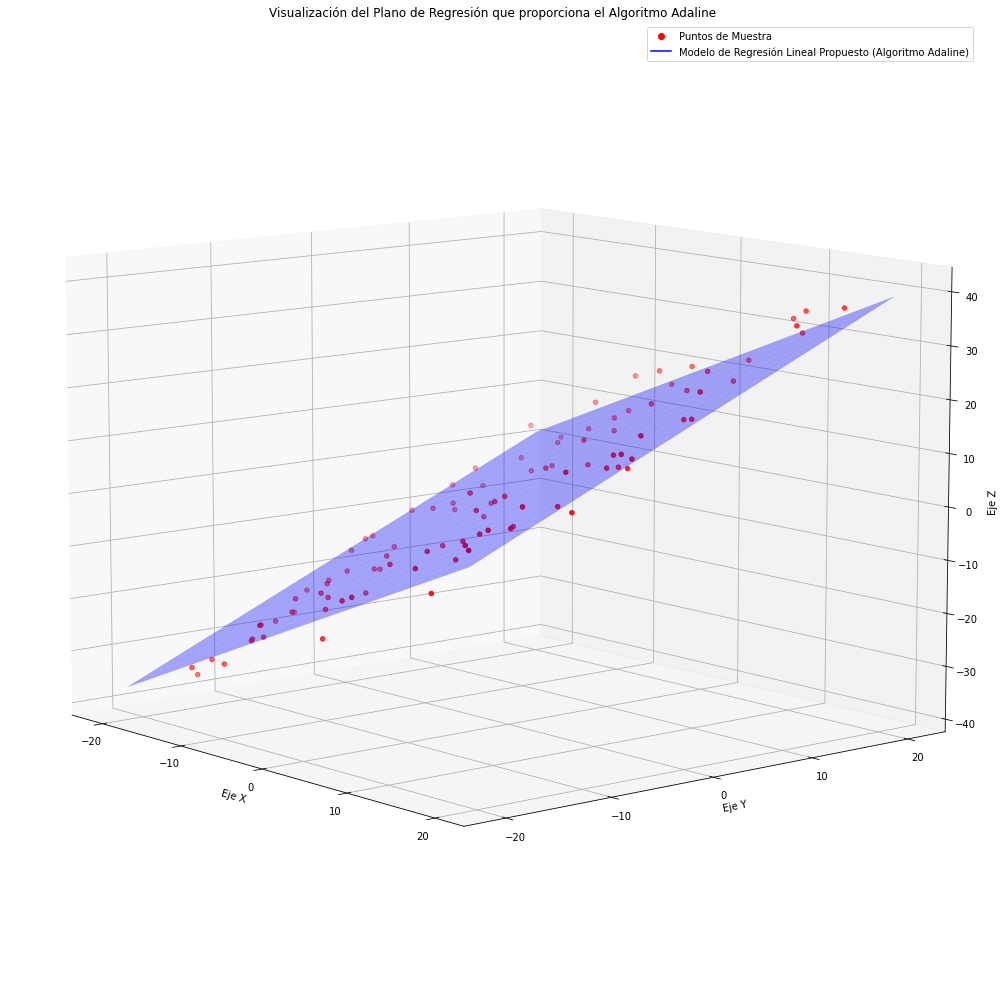

In [8]:
%matplotlib inline

if numeroDimensiones == 2:
    listaValoresCoordenadaXHiperplanoBase = np.linspace(minimoEjeX, maximoEjeX, num = numeroMuestrasHiperplanoRegresion)
    listaValoresCoordenadaYHiperplanoBase = [listaCoeficientesHiperplanoBase[0] * valorX + listaCoeficientesHiperplanoBase[1] for valorX in listaValoresCoordenadaXHiperplanoBase]

    plt.figure(num = 3, figsize = (15, 14))
    plt.plot(valoresCoordenadasXPuntosMuestra, valoresCoordenadasYPuntosMuestra, 'ro', label = "Puntos de Muestra")
    plt.plot(listaValoresCoordenadaXHiperplanoBase, listaValoresCoordenadaYHiperplanoBase, 'b-', label = "Modelo de Regresión Lineal Propuesto (Algoritmo Adaline)")
    plt.legend(loc = 'upper left')
    plt.xlabel("Eje X")
    plt.ylabel("Eje Y")
    plt.title("Visualización de la Recta de Regresión que proporciona el Algoritmo Adaline")
    plt.grid(True)
    plt.show()
elif numeroDimensiones == 3:
    valoresCoordenadasZPuntosMuestra = listaPuntosPorCoordenadasRespectivas[2]
    minimoEjeY = np.min(valoresCoordenadasYPuntosMuestra) - 1
    maximoEjeY = np.max(valoresCoordenadasYPuntosMuestra) + 1

    listaValoresCoordenadaXHiperplanoBase = np.linspace(minimoEjeX, maximoEjeX, num = numeroMuestrasHiperplanoRegresion)
    listaValoresCoordenadaYHiperplanoBase = np.linspace(minimoEjeY, maximoEjeY, num = numeroMuestrasHiperplanoRegresion)
    listaValoresCoordenadaXHiperplanoBase, listaValoresCoordenadaYHiperplanoBase = np.meshgrid(listaValoresCoordenadaXHiperplanoBase, listaValoresCoordenadaYHiperplanoBase)
    listaValoresCoordenadaZHiperplanoBase = listaCoeficientesHiperplanoBase[0] * listaValoresCoordenadaXHiperplanoBase + listaCoeficientesHiperplanoBase[1] * listaValoresCoordenadaYHiperplanoBase + listaCoeficientesHiperplanoBase[2]
    
    currentFigure = plt.figure(num = 3, figsize = (15, 14))
    ax = currentFigure.gca(projection = '3d')
    ax.view_init(elev = 10, azim = -40)
    ax.scatter(valoresCoordenadasXPuntosMuestra, valoresCoordenadasYPuntosMuestra, valoresCoordenadasZPuntosMuestra, c = 'r', marker = 'o')
    etiquetaLeyendaPuntosMuestra = mpl.lines.Line2D([0], [0], linestyle = "none", c = 'r', marker = 'o')
    ax.plot_surface(listaValoresCoordenadaXHiperplanoBase, listaValoresCoordenadaYHiperplanoBase, listaValoresCoordenadaZHiperplanoBase, color = 'b', alpha = 0.35)
    etiquetaLeyendaPlano = mpl.lines.Line2D([0], [0], linestyle = "-", c = 'b')
    ax.set_xlabel("Eje X")
    ax.set_ylabel("Eje Y")
    ax.set_zlabel("Eje Z")
    ax.set_title("Visualización del Plano de Regresión que proporciona el Algoritmo Adaline")
    ax.legend([etiquetaLeyendaPuntosMuestra, etiquetaLeyendaPlano], ["Puntos de Muestra", "Modelo de Regresión Lineal Propuesto (Algoritmo Adaline)"], numpoints = 1)
    plt.tight_layout()
    plt.show()